**Table of contents**<a id='toc0_'></a>    
- [multiple features prediction](#toc1_)    
  - [1 Problem Statement](#toc1_1_)    
  - [2 visualize data](#toc1_2_)    
  - [3 utils functions](#toc1_3_)    
  - [4 start algorithm](#toc1_4_)    
  - [5 some result plots](#toc1_5_)    
    - [cost function](#toc1_5_1_)    
  - [6 predict](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[multiple features prediction](#toc0_)

## <a id='toc1_1_'></a>[1 Problem Statement](#toc0_)

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

## <a id='toc1_2_'></a>[2 visualize data](#toc0_)

In [6]:
# load the dataset
import numpy as np

def load_data():
    data = np.loadtxt("data/houses.txt", delimiter=',')
    X = data[:,:4]
    y = data[:,4]
    return X, y

X_train, y_train = load_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [7]:
# print x_train
print(">>>>>>")
print("Type of X_train:",type(X_train))
print("First five elements of X_train are:\n", X_train[:5]) 
print("Shape of X_train:", X_train.shape)

# print y_train
print(">>>>>>")
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  
print("Shape of y_train:", y_train.shape)

>>>>>>
Type of X_train: <class 'numpy.ndarray'>
First five elements of X_train are:
 [[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]]
Shape of X_train: (100, 4)
>>>>>>
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [271.5 300.  509.8 394.  540. ]
Shape of y_train: (100,)


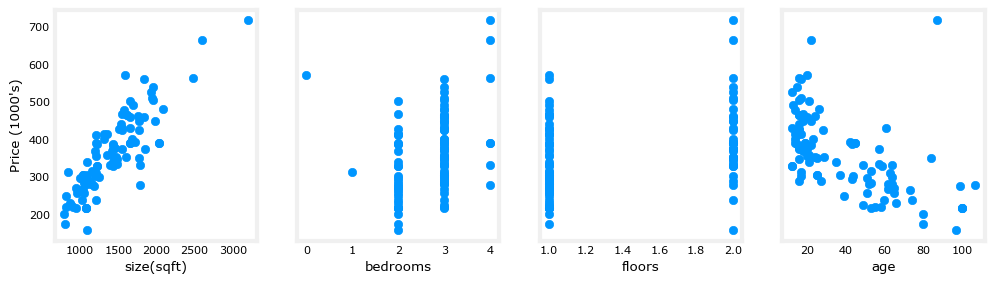

In [8]:
import matplotlib.pyplot as plt
plt.style.use('../lib/deeplearning.mplstyle')

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

## <a id='toc1_3_'></a>[3 utils functions](#toc0_)

- $\mathbf{X}$: vector of features for one example $x^{(i)}$
- $\mathbf{w}$: vector of weights for the features in $\mathbf{X}$
- model: $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$$
- cost function: $$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
- gradient descent for multiple variables:
$$
\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}
$$
where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  
$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
m is the number of training examples in the data set

In [9]:
import copy
import math

def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

## <a id='toc1_4_'></a>[4 start algorithm](#toc0_)

In [10]:
# initialize parameters
initial_w = np.zeros(len(X_features))
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2069.28   
Iteration  100: Cost  1548.84   
Iteration  200: Cost  1530.28   
Iteration  300: Cost  1513.36   
Iteration  400: Cost  1497.93   
Iteration  500: Cost  1483.86   
Iteration  600: Cost  1471.03   
Iteration  700: Cost  1459.33   
Iteration  800: Cost  1448.66   
Iteration  900: Cost  1438.93   
b,w found by gradient descent: 0.00,[ 0.25920488 -0.00214374 -0.00376426 -0.25542933] 
prediction: 230.15, target value: 271.5
prediction: 306.10, target value: 300.0
prediction: 500.32, target value: 509.8
prediction: 436.39, target value: 394.0
prediction: 503.94, target value: 540.0
prediction: 337.01, target value: 415.0
prediction: 207.09, target value: 230.0
prediction: 471.55, target value: 560.0
prediction: 254.95, target value: 294.0
prediction: 805.66, target value: 718.2
prediction: 183.81, target value: 200.0
prediction: 306.69, target value: 302.0
prediction: 398.98, target value: 468.0
prediction: 365.55, target value: 374.2
prediction: 312.39, tar

## <a id='toc1_5_'></a>[5 some result plots](#toc0_)

### <a id='toc1_5_1_'></a>[cost function](#toc0_)

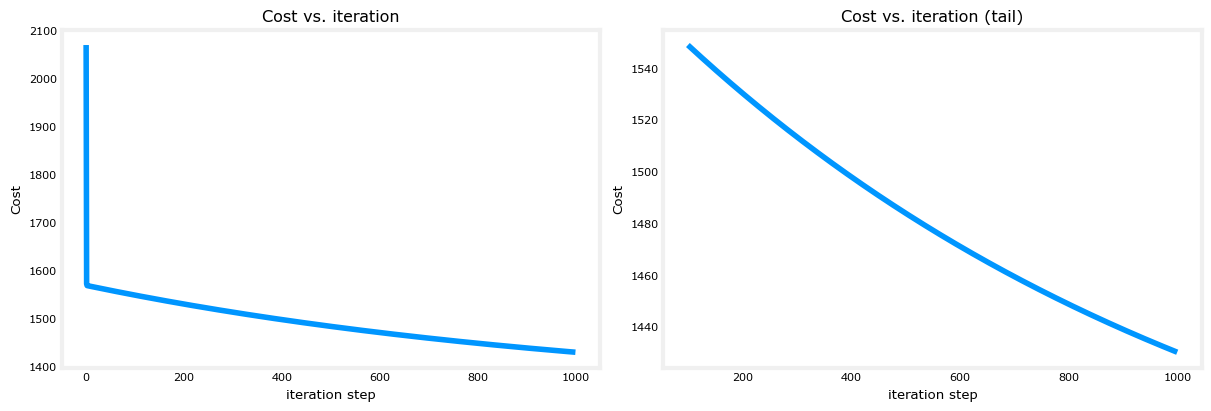

In [11]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## <a id='toc1_6_'></a>[6 predict](#toc0_)

In [12]:
predict_X = np.array([1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01])
predict_y = np.dot(predict_X, w_final) + b_final
print('Predict house price: ', predict_y)

Predict house price:  500.3183591321865
